# Comparing normalizations

Trying to check differences of performance between different normalization techniques accross model versions 2.10 and 2.11

In [17]:
MAIN_DUMP='../../dump/'
import os,sys
from joblib import Parallel, delayed,dump,load

sys.path.append(os.path.abspath('../../src/ml'))
from load_matrix import load_df
from model_trainer import MLModel
from utils import load_models

import pandas as pd

from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer


### analysis

In [ ]:
from IPython.display import display
all_results=pd.read_csv('../../results/tables/scores_all.csv')
display(all_results)

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,pytorch_mlp,Complex_protein_embeddings,none,v2.10,0.980769,1.000000,0.961538,0.980392,0.917249,1.000000,1.000000,0.019917
1,pytorch_mlp,Complex_sample_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.500000,0.787879,0.212121
2,pytorch_mlp,concatenated_protein_embeddings,none,v2.10,0.500000,0.787879,1.000000,0.881356,0.000000,0.500000,0.787879,0.212121
3,pytorch_mlp,concatenated_sample_embeddings,none,v2.10,0.557692,1.000000,0.115385,0.206897,0.164083,0.557692,0.812354,0.696970
4,pytorch_mlp,gene_expression,none,,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.787879,0.787879
...,...,...,...,...,...,...,...,...,...,...,...,...
90,svm,concatenated_protein_embeddings,minmax,v2.11,0.961538,1.000000,0.923077,0.960000,0.847319,0.967033,0.992023,0.057106
91,svm,RGCN_protein_embeddings,minmax,v2.11,0.961538,1.000000,0.923077,0.960000,0.847319,0.967033,0.992023,0.054701
92,xgboost,Complex_protein_embeddings,minmax,v2.11,0.961538,1.000000,0.923077,0.960000,0.847319,1.000000,1.000000,0.028402
93,xgboost,concatenated_protein_embeddings,minmax,v2.11,0.961538,1.000000,0.923077,0.960000,0.847319,0.994505,0.998575,0.040890


In [27]:
datasets=['Complex_protein_embeddings','RGCN_protein_embeddings','concatenated_protein_embeddings']
temp_df=all_results[all_results['input'].isin(datasets)].sort_values(by=['input','model','version','normalization'])

In [28]:
df=temp_df
df['normalization'].unique()

array(['log1p', 'minmax', 'none', 'robust', 'standard'], dtype=object)

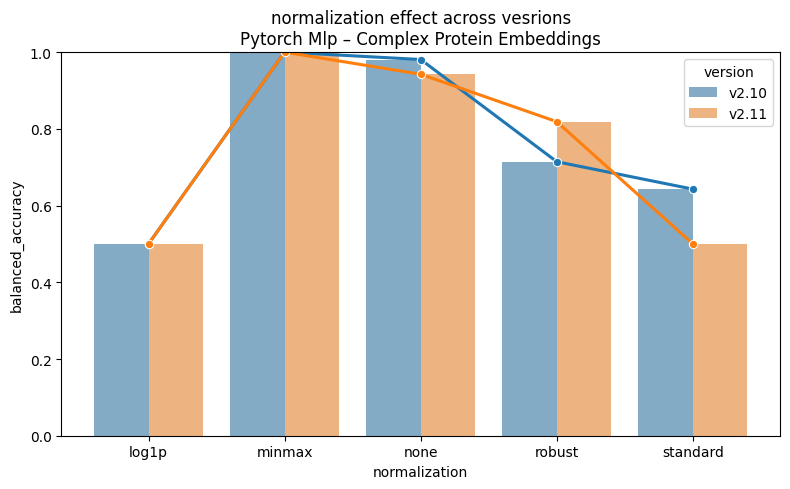

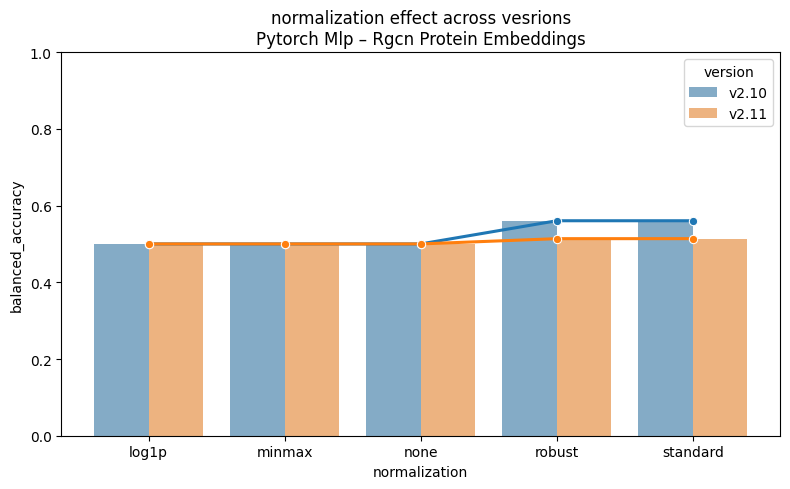

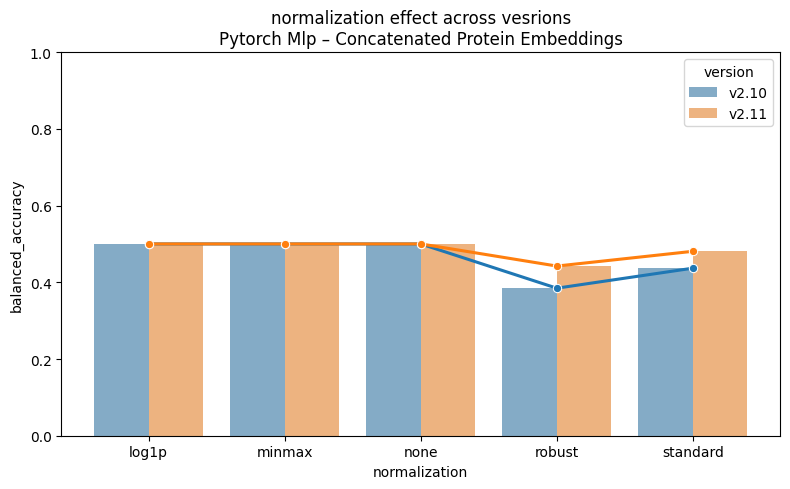

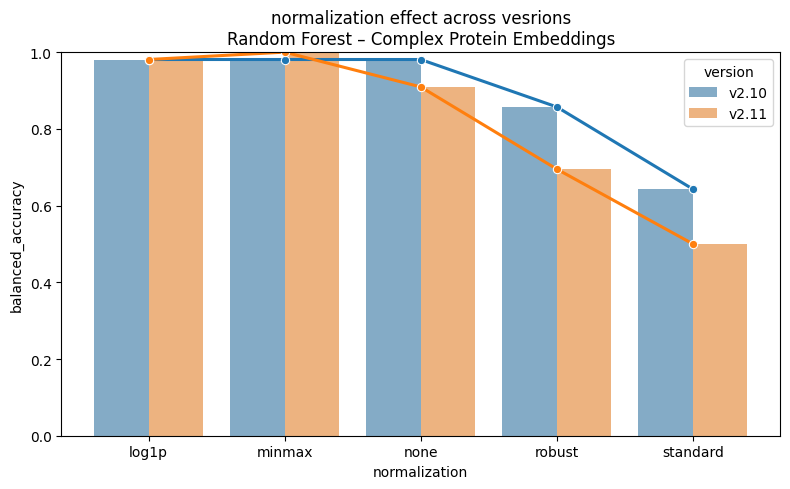

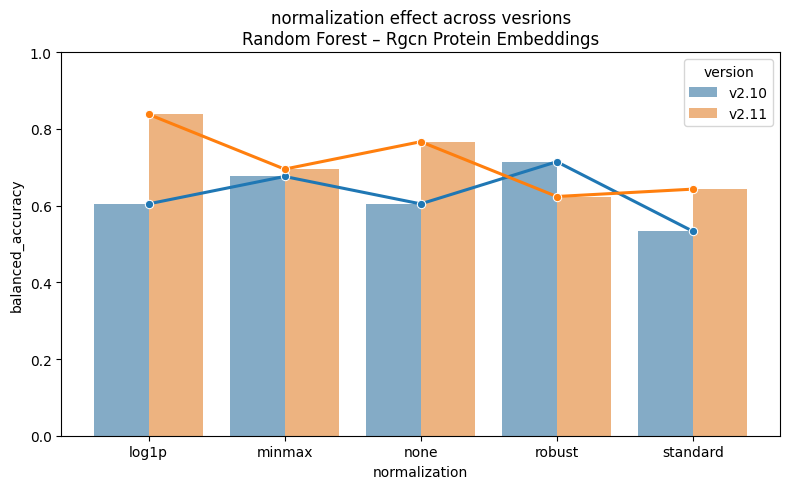

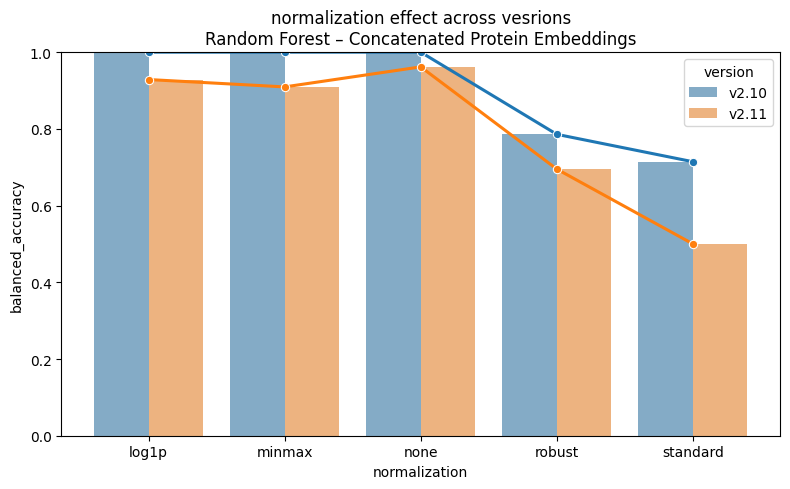

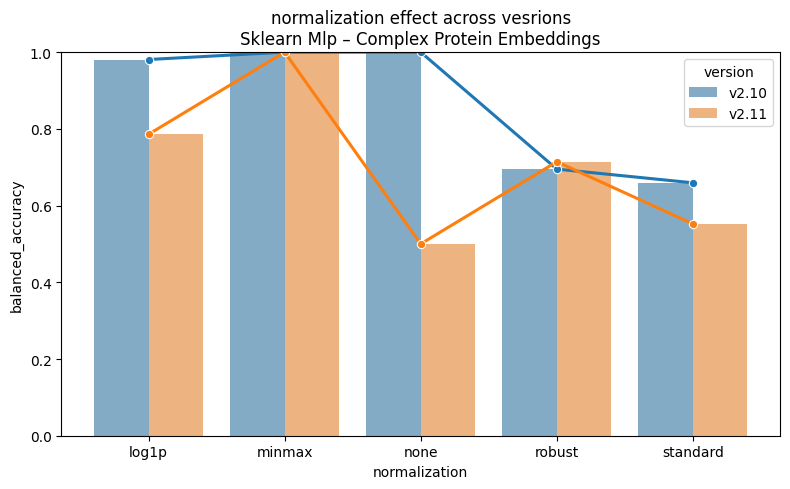

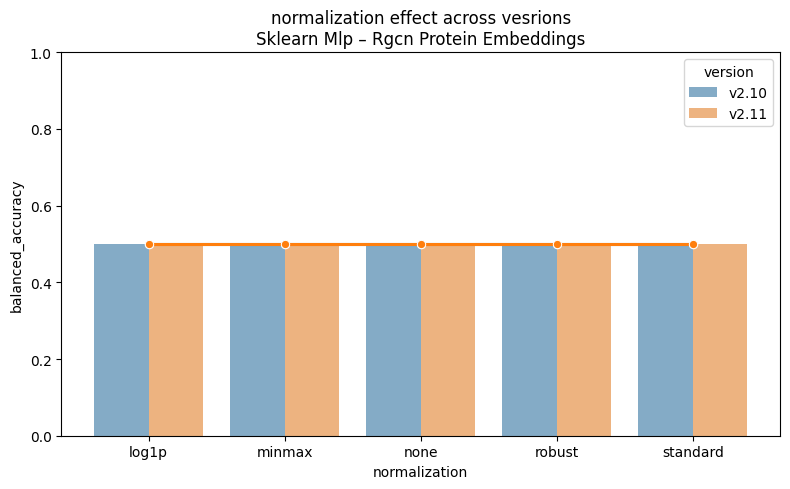

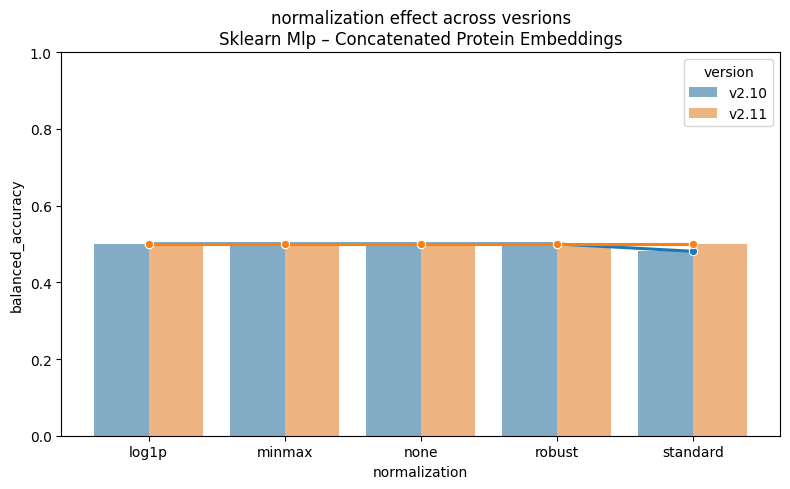

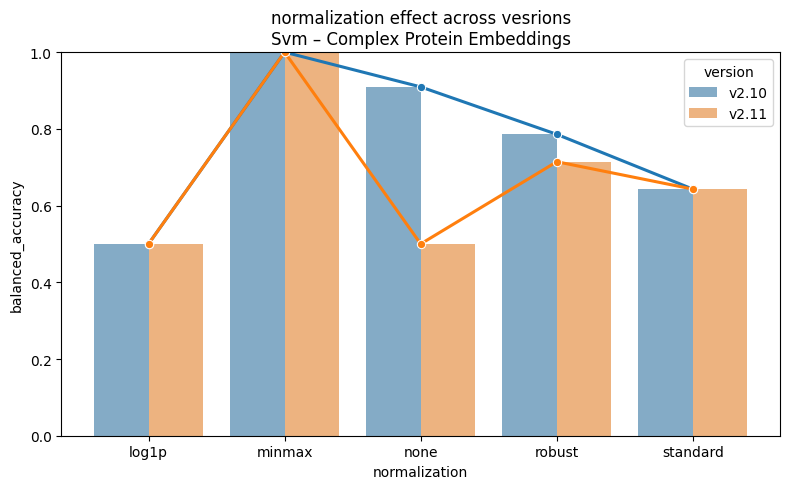

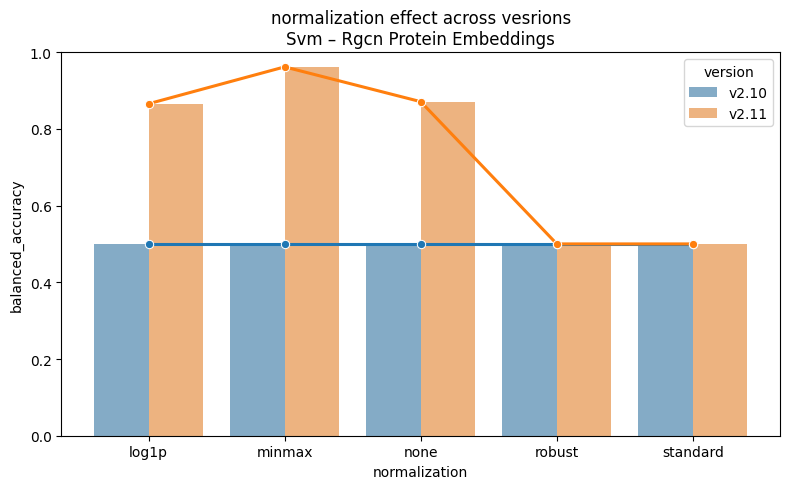

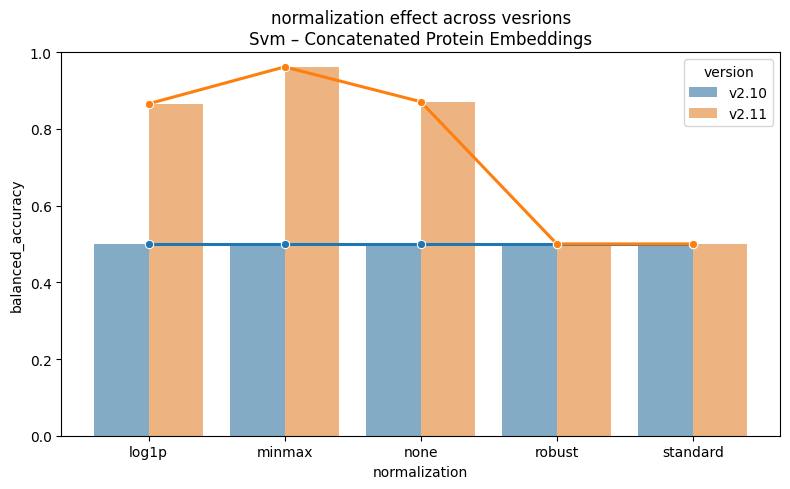

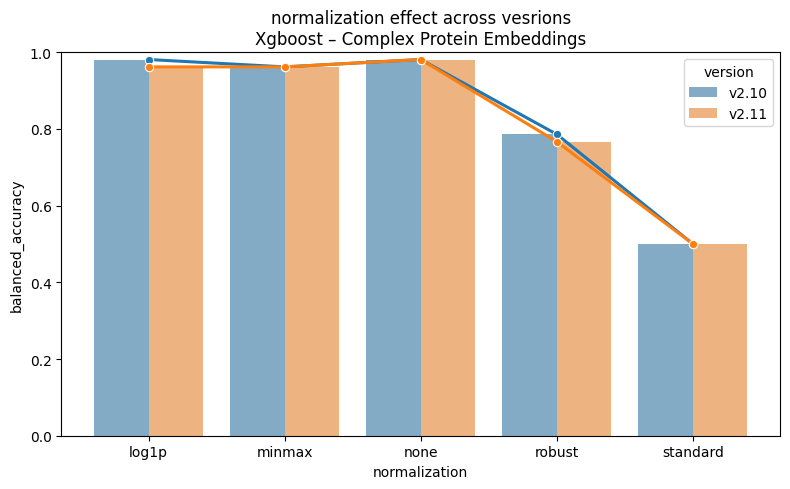

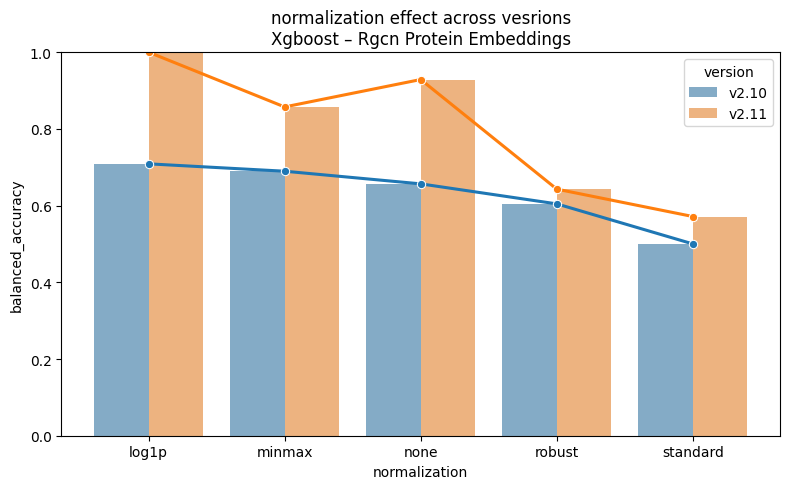

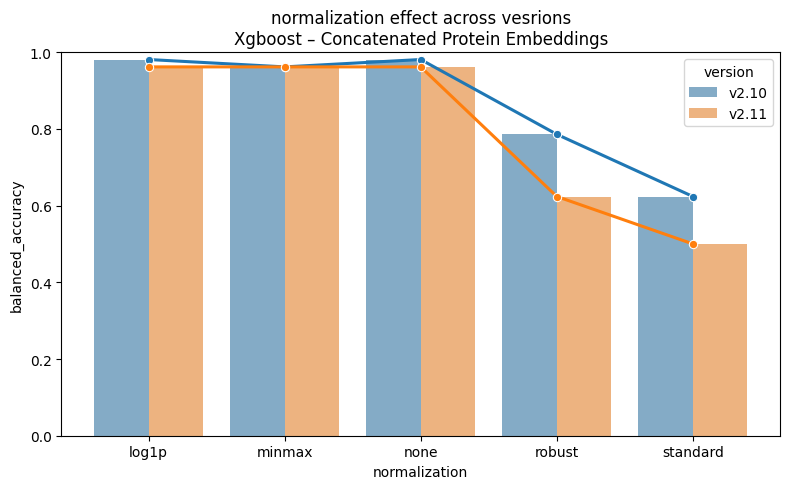

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

metric='balanced_accuracy'

for model in df['model'].unique():
    for dataset in df['input'].unique():
        subset = df[(df["model"] == model) & (df["input"] == dataset)]
        
        plt.figure(figsize=(8,5))
        
        sns.barplot(
            data=subset,
            x="normalization",
            y=metric,
            hue="version",
            alpha=0.6, 
            ci=None      # remove confidence interval for cleaner look
        )
        
        sns.lineplot(
            data=subset,
            x="normalization",
            y=metric,
            hue="version",
            marker="o",
            linewidth=2.2,
            legend=False   # avoid duplicate legend
        )

        plt.ylabel(metric)
        plt.xlabel("normalization")
        plt.title(f"normalization effect across vesrions\n{model.replace('_',' ').title()} – {dataset.replace('_',' ').title()}")
        plt.ylim(0, 1)

        plt.tight_layout()
        plt.show()